In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

<a id='3'></a>
# Exploaring the Data

In [11]:
df = pd.read_csv('BlackFriday.csv')

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df.shape

(537577, 12)

In [14]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [16]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [17]:
df.columns[df.isna().any()]

Index(['Product_Category_2', 'Product_Category_3'], dtype='object')

In [18]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [19]:
df.Product_Category_2.fillna(0, inplace=True)
df.Product_Category_3.fillna(0, inplace=True)

In [20]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [21]:
df.shape

(537577, 12)

In [22]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

<a id='5'></a>
# EDA

In [23]:
df.Occupation = df.Occupation.astype('int32')
df.Occupation.dtypes

dtype('int32')

In [24]:
df.Product_Category_1 = df.Product_Category_1.astype('int32')
df.Product_Category_2 = df.Product_Category_2.astype('int32')
df.Product_Category_3 = df.Product_Category_3.astype('int32')

In [25]:
df.Gender.value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [26]:
df.Marital_Status.value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [27]:
df.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [28]:
df.Occupation.value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

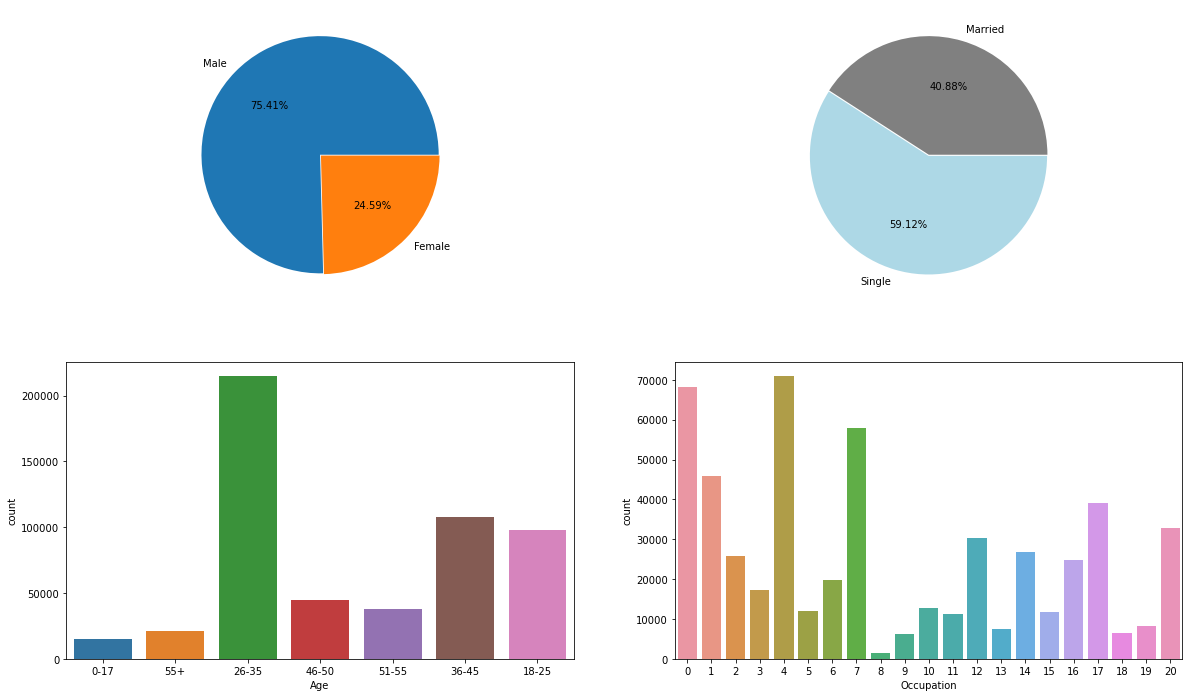

In [29]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
male = df.Gender[df.Gender == 'M'].count()
female = df.Gender[df.Gender == 'F'].count()
plt.pie([male, female], labels=['Male', 'Female'], explode=(0,0.01), autopct="%.2f%%")

plt.subplot(2,2,2)
married = df.Marital_Status[df.Marital_Status == 1].count()
single = df.Marital_Status[df.Marital_Status == 0].count()
plt.pie([married, single], labels=['Married', 'Single'], explode=(0,0.01), autopct="%.2f%%", colors=['grey', 'lightblue'])

plt.subplot(2,2,3)
sns.countplot(x='Age', data=df)

plt.subplot(2,2,4)
sns.countplot(x='Occupation', label=True,data=df)

***- there is 76.11% male and 23.89% Female buyers from the store*** <br>
***- The age group between 26-35 years is the most popular in the store most purchases are made by people between 18 to 45 age group***<br>
***- About 60% of the buyers are singels and 40% are married*** <br>
***- we do not known to each occupation each number corresponds, is difficult to make any analysis.***

In [30]:
df.Product_Category_1.value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [31]:
df.Product_Category_2.value_counts()

0     166986
8      63058
14     54158
2      48481
16     42602
15     37317
5      25874
4      25225
6      16251
11     13945
17     13130
13     10369
9       5591
12      5419
10      2991
3       2835
18      2730
7        615
Name: Product_Category_2, dtype: int64

In [32]:
df.Product_Category_3.value_counts()

0     373299
16     32148
15     27611
14     18121
17     16449
5      16380
8      12384
9      11414
12      9094
13      5385
6       4818
18      4563
4       1840
11      1773
10      1698
3        600
Name: Product_Category_3, dtype: int64

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

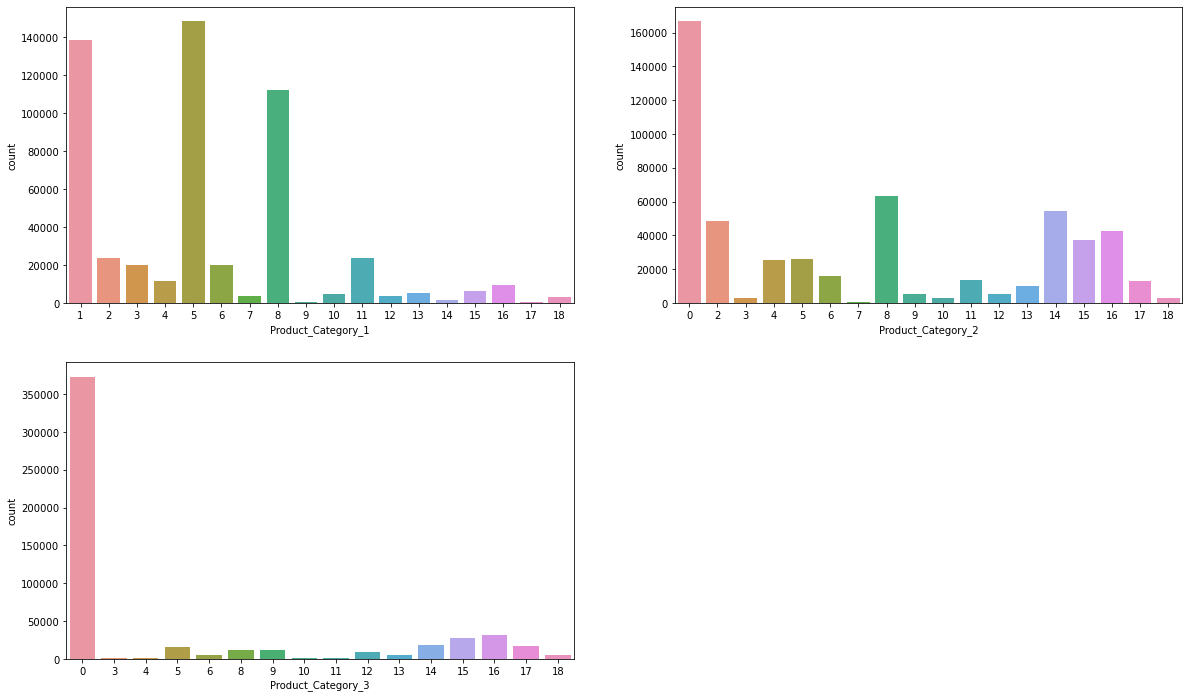

In [33]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x='Product_Category_1', data=df)

plt.subplot(2,2,2)
sns.countplot(x='Product_Category_2', data=df)

plt.subplot(2,2,3)
sns.countplot(x='Product_Category_3', data=df)

In [34]:
df.City_Category.value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [35]:
df.Stay_In_Current_City_Years.value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

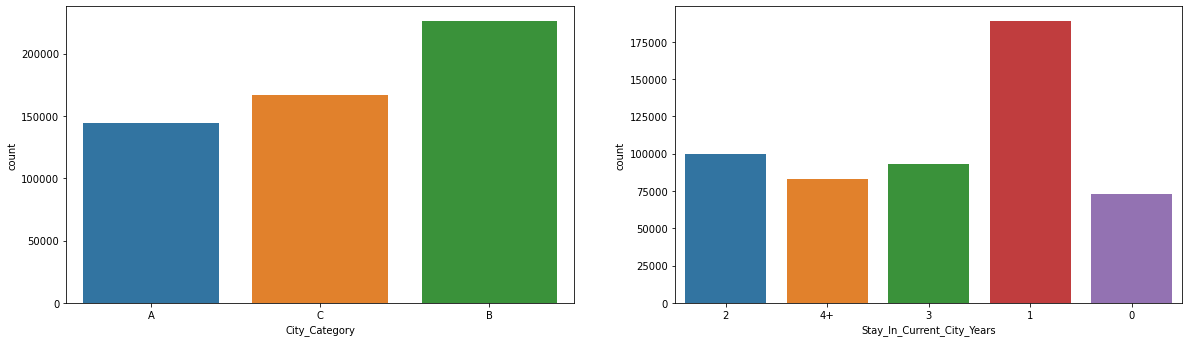

In [36]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x='City_Category', data=df)

plt.subplot(2,2,2)
sns.countplot(x='Stay_In_Current_City_Years', data=df)


***- Pepole from City_Category B are more likely to come to the store***<br>
***- It can be observed that, as people who are new in the the current city, they tend to visit the store more frequently***

In [37]:
#Creating new column in the dataset 
df2 = df.copy()
df2.Marital_Status = df2.Marital_Status.apply(lambda x: 'Married' if x==1 else 'Single')
df2['Gender_MaritalStatus'] = df2.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
df2.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_MaritalStatus
0,1000001,P00069042,F,0-17,10,A,2,Single,3,0,0,8370,F_Single
1,1000001,P00248942,F,0-17,10,A,2,Single,1,6,14,15200,F_Single
2,1000001,P00087842,F,0-17,10,A,2,Single,12,0,0,1422,F_Single


In [38]:
df2.Gender_MaritalStatus.value_counts()

M_Single     240843
M_Married    164537
F_Single      76974
F_Married     55223
Name: Gender_MaritalStatus, dtype: int64

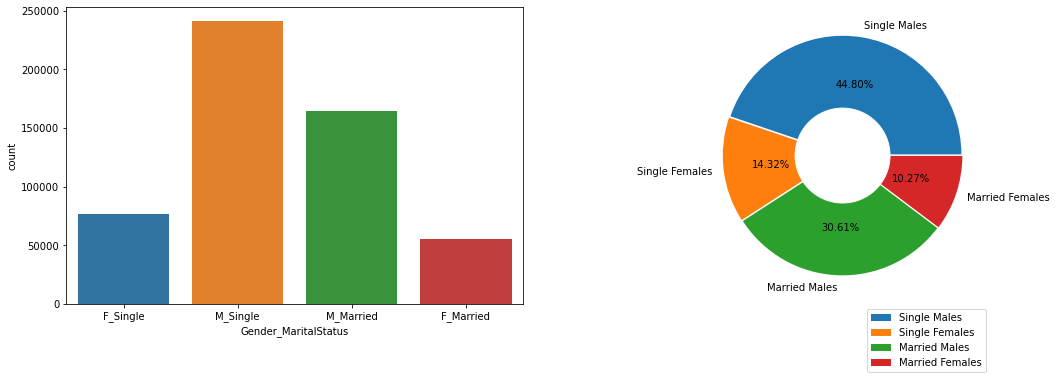

In [39]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Gender_MaritalStatus', data=df2);

# Visuiliaze with pie chart to see the ratio
plt.subplot(2,2,2)
m_single = df2.Gender_MaritalStatus[df2.Gender_MaritalStatus == 'M_Single'].count()
f_single = df2.Gender_MaritalStatus[df2.Gender_MaritalStatus == 'F_Single'].count()
m_married = df2.Gender_MaritalStatus[df2.Gender_MaritalStatus == 'M_Married'].count()
f_married = df2.Gender_MaritalStatus[df2.Gender_MaritalStatus == 'F_Married'].count()
labels = ['Single Males', 'Single Females', 'Married Males', 'Married Females']

plt.pie([m_single, f_single, m_married, f_married], labels=labels, autopct='%.2f%%', explode=(0.01,0.01,0.01,0.01))
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(1, 0))

plt.show()

***- Single Males are more likely to visit the store***<br>
***- Single female buyers are more in number than married ones***

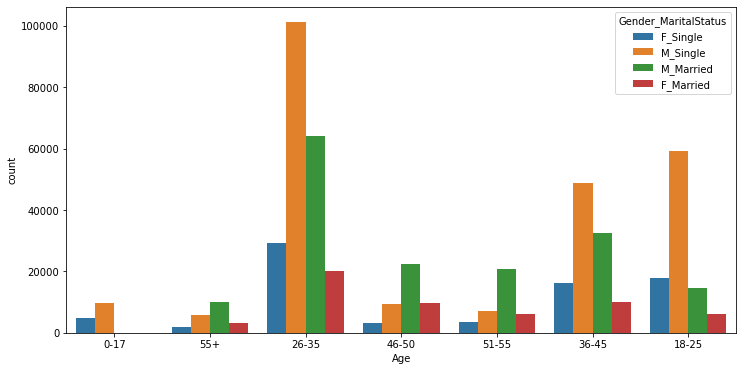

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue='Gender_MaritalStatus', data=df2);

***- Males (single and married) between the age group of 26-35 are major buyers***<br>
***- Single Males Between the age 18-45 are more likely to visit the store***




<Figure size 1440x864 with 0 Axes>

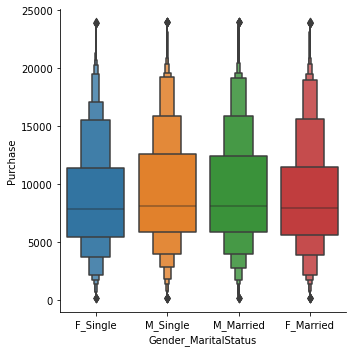

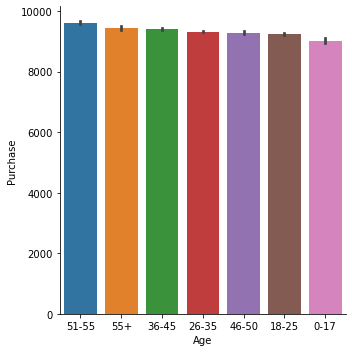

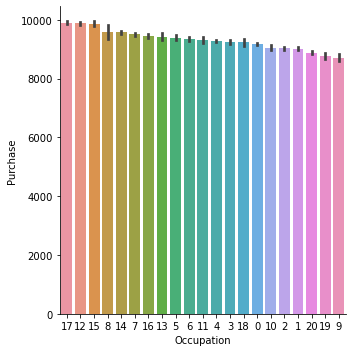

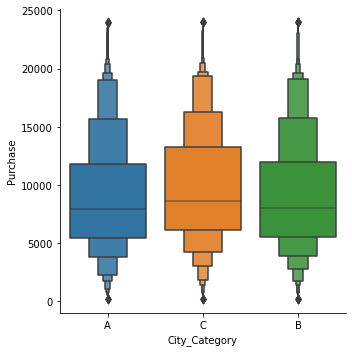

In [41]:
plt.figure(figsize =(20,12))

sns.catplot(x='Gender_MaritalStatus', y='Purchase', data=df2, kind='boxen')

ordr_occ =df2.groupby(["Age"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Age', y='Purchase', order=ordr_occ, data = df2, kind='bar')

ordr_occ =df2.groupby(["Occupation"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Occupation', y='Purchase', order=ordr_occ, data=df2, kind='bar')


sns.catplot(x='City_Category', y='Purchase', data=df2, kind='boxen')


plt.show()


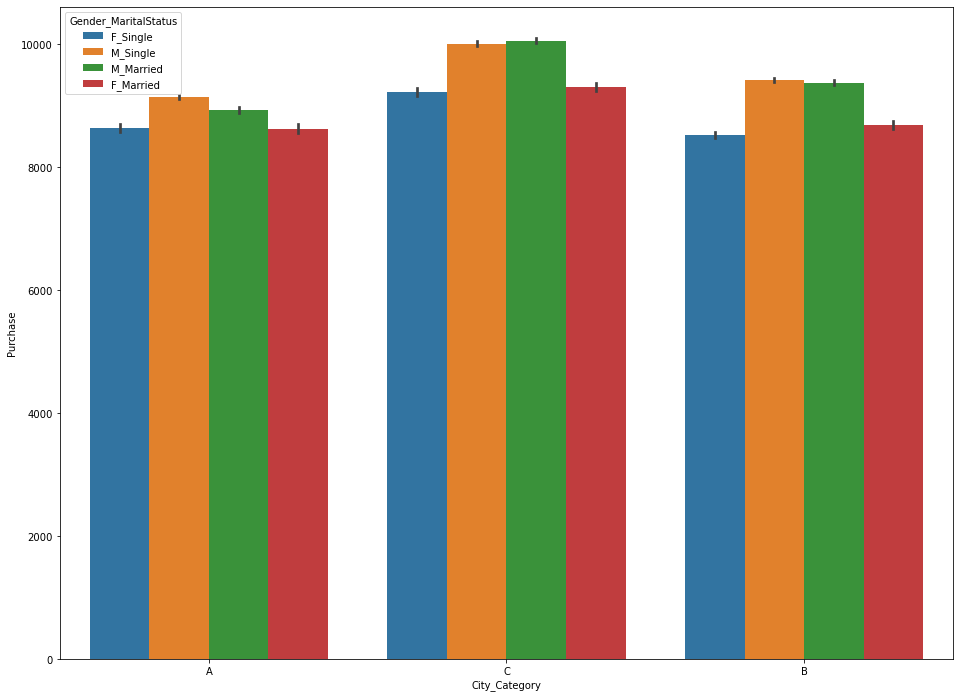

In [42]:
plt.figure(figsize = (16,12))
sns.barplot(x='City_Category',y='Purchase',hue='Gender_MaritalStatus',data = df2);

***- in City_Category A,B,C Males (Single or Married) spends more***<br>
***- Females (Single or Married) in City Category C spends more***

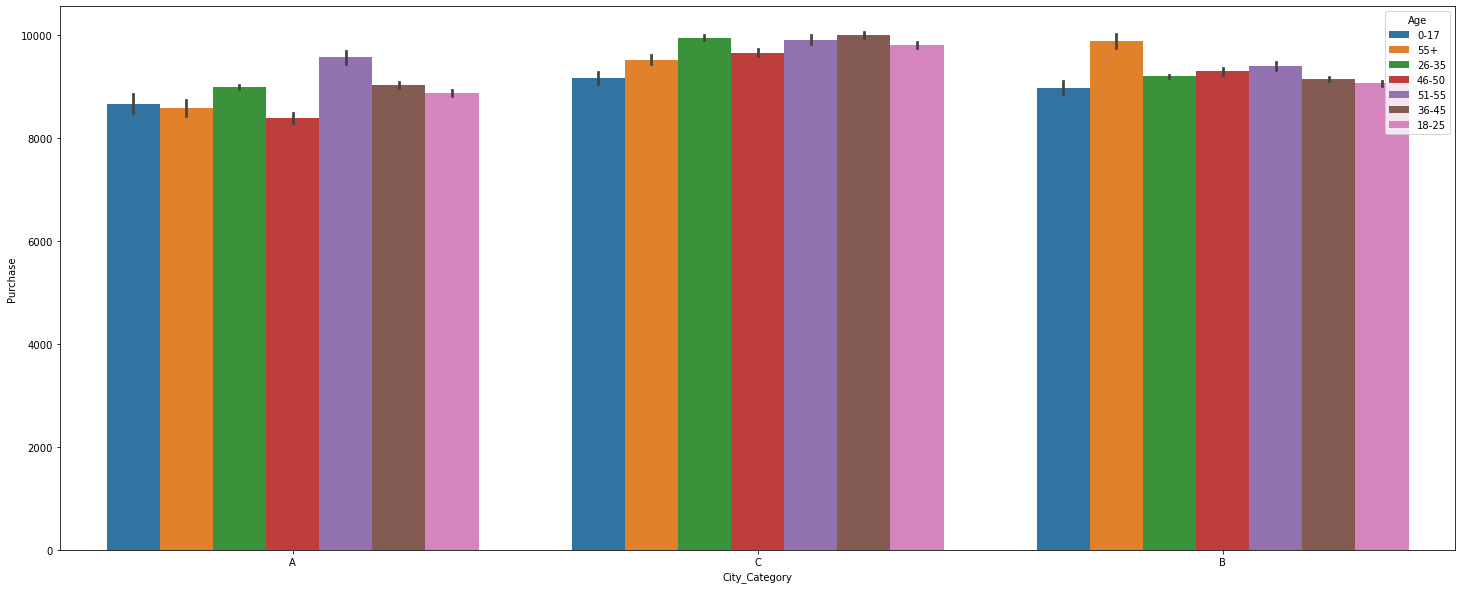

In [43]:
plt.figure(figsize = (25,10))
sns.barplot(x='City_Category', y='Purchase',hue = 'Age',data = df);

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

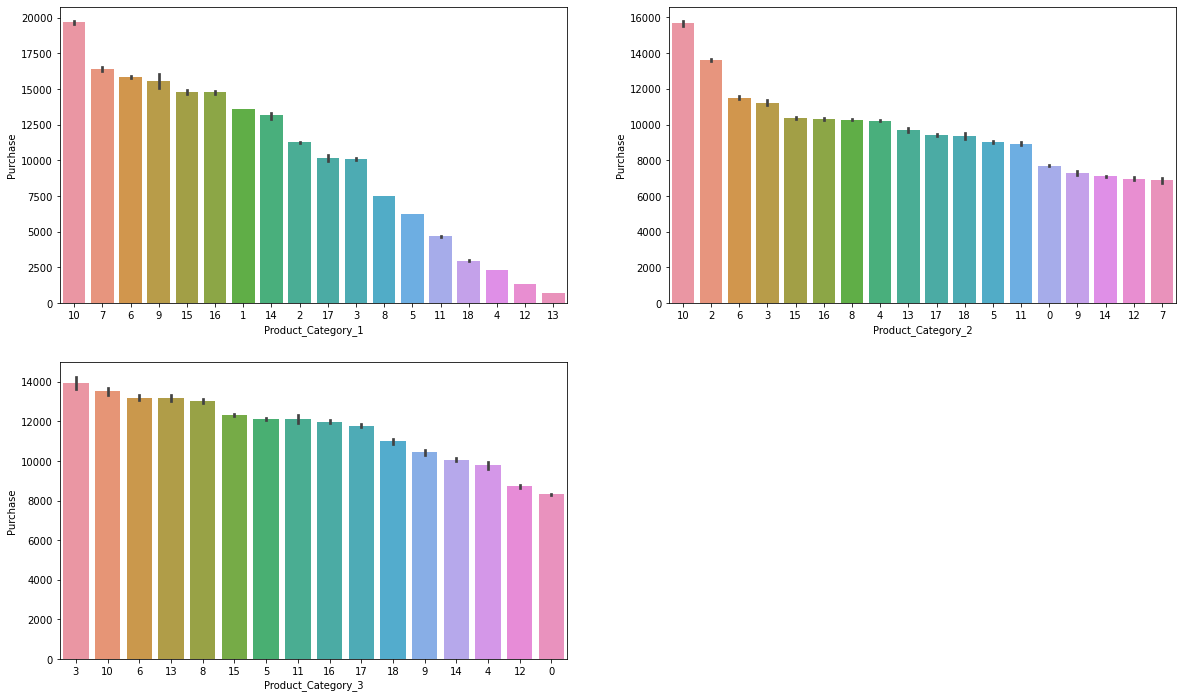

In [44]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
order = df.groupby('Product_Category_1').mean().sort_values(by='Purchase',ascending=False).index
sns.barplot(x='Product_Category_1',y='Purchase', data=df, order=order)

plt.subplot(2,2,2)
order = df.groupby('Product_Category_2').mean().sort_values(by='Purchase',ascending=False).index
sns.barplot(x='Product_Category_2', y='Purchase', data=df, order=order)

plt.subplot(2,2,3)
order = df.groupby('Product_Category_3').mean().sort_values(by='Purchase',ascending=False).index
sns.barplot(x='Product_Category_3', y='Purchase', data=df, order=order)

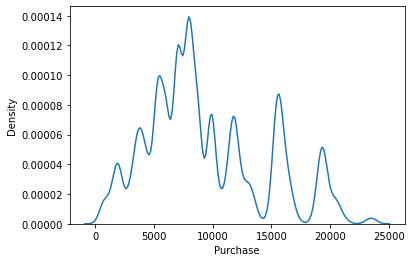

In [45]:
sns.kdeplot(x='Purchase', data=df);

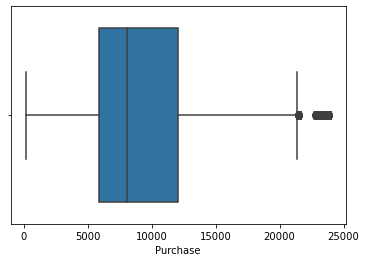

In [46]:
sns.boxplot(x='Purchase', data = df);

In [47]:
FEATURES = [col for col in df.columns if col not in ['Purchase', 'User_ID', 'Product_ID']]
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

In [48]:
FEATURES

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [49]:
cat_features

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [50]:
cont_features

[]

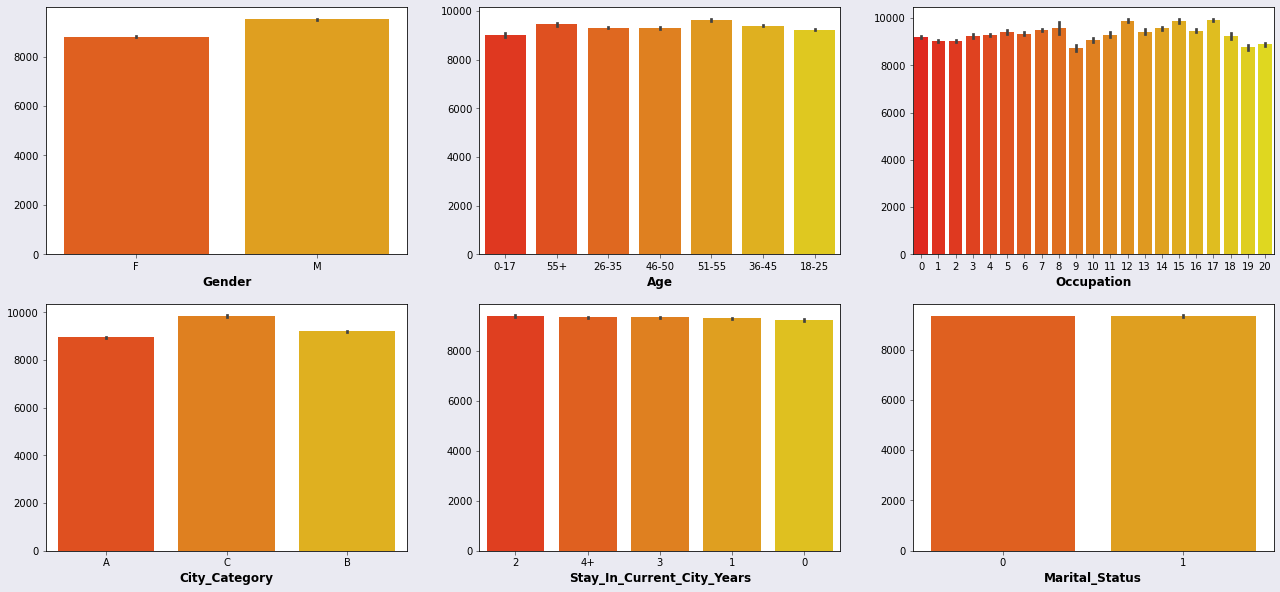

In [51]:
ncols = 3
nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.barplot(y=df['Purchase'], x=df[col], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

In [52]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [53]:
df3 = df.copy()
df3.drop(['User_ID', 'Product_ID'], axis=1, inplace=True) # non-important Featuers
df3.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422


In [54]:
encode_x = LabelEncoder()

In [55]:
df3.Gender = encode_x.fit_transform(df3['Gender'])
df3.Age = encode_x.fit_transform(df3['Age'])
df3.City_Category = encode_x.fit_transform(df3['City_Category'])
df3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4+,0,8,0,0,7969


In [56]:
df3.Marital_Status = df3.Marital_Status.astype('int32')

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      537577 non-null  int32 
 1   Age                         537577 non-null  int32 
 2   Occupation                  537577 non-null  int32 
 3   City_Category               537577 non-null  int32 
 4   Stay_In_Current_City_Years  537577 non-null  object
 5   Marital_Status              537577 non-null  int32 
 6   Product_Category_1          537577 non-null  int32 
 7   Product_Category_2          537577 non-null  int32 
 8   Product_Category_3          537577 non-null  int32 
 9   Purchase                    537577 non-null  int64 
dtypes: int32(8), int64(1), object(1)
memory usage: 24.6+ MB


In [58]:
df3.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [59]:
df3.Stay_In_Current_City_Years = df3.Stay_In_Current_City_Years.replace('4+', 4)
df3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969


In [60]:
df3[df3.columns[0:]].corr()['Purchase'].sort_values(ascending=False)

Purchase              1.000000
Product_Category_3    0.284120
City_Category         0.068507
Gender                0.060086
Product_Category_2    0.038395
Occupation            0.021104
Age                   0.017717
Marital_Status        0.000129
Product_Category_1   -0.314125
Name: Purchase, dtype: float64

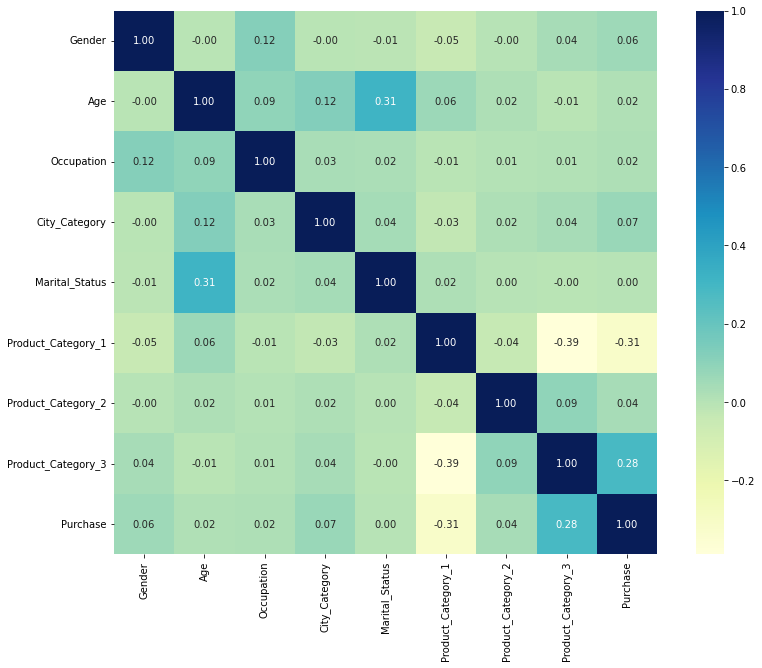

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(df3.corr(), cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

In [62]:
df3.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [63]:
FEATURES

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [64]:
df3["mean"] = df3[FEATURES].mean(axis=1)
df3["std"] = df3[FEATURES].std(axis=1)
df3["min"] = df3[FEATURES].min(axis=1)
df3["max"] = df3[FEATURES].max(axis=1)

In [65]:
df3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,mean,std,min,max
0,0,0,10,0,2,0,3,0,0,8370,1.625,3.543102,0,10
1,0,0,10,0,2,0,1,6,14,15200,3.875,5.514591,0,14
2,0,0,10,0,2,0,12,0,0,1422,2.750,5.119989,0,12
3,0,0,10,0,2,0,12,14,0,1057,4.500,6.301927,0,14
4,1,6,16,2,4,0,8,0,0,7969,4.125,5.667892,0,16
